In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [3]:
df = pd.read_csv('train.csv')

In [4]:
#Antes de mudar formatos

# SEATS __________________________________________________
# Check for model cars with missing values in the 'seats' column
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)

# Update number of seats based on conditions
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI']), 'seats'] = 5
df.loc[df['full_name'] == '2008 Ford Endeavour 3.0 4x4 Thunder Plus', 'seats'] = 7

# Check
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)


# ENGINE __________________________________________________
#remove cc from engine_capacity
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')

# FUEL TYPE __________________________________________________
# unique 'fuel_type'
valores_unicos_fuel_type = df['fuel_type'].unique()
print()
print(valores_unicos_fuel_type)

# KMS __________________________________________________
#remove kms from kms_driven
df['kms_driven'] = df['kms_driven'].str.replace('Kms', '')
# Remover vírgula e espaço em branco da coluna 'kms_driven'
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.strip()

# MAX POWER __________________________________________________
Correct_Max_Power = []
for power in df['max_power']:
    if pd.notna(power):
        if isinstance(power, str):
            if 'bhp' in power:
                num_bhp = float(re.search(r'\d+.?\d', power).group())
                Correct_Max_Power.append(num_bhp)
            elif 'PS' in power:
                num_ps = float(re.search(r'\d+.?\d', power).group())
                num_bhp = round(num_ps * 0.98632, 2)
                Correct_Max_Power.append(num_bhp)
            else:
                num = re.search(r'\d+\.?\d*', power)
                Correct_Max_Power.append(float(num.group()) if num else None)
        else:
            Correct_Max_Power.append(power)
    else:
        Correct_Max_Power.append(None)


# Converter os valores não NaN para float
Correct_Max_Power = [float(value) if value is not None else value for value in Correct_Max_Power]

df['max_power'] = Correct_Max_Power

# OWNER TYPE __________________________________________________
# Removendo espaços em branco na coluna 'owner_type'
df.dropna(subset=['owner_type'], inplace=True)

# Verificando os valores únicos após a remoção dos espaços em branco
unique_values = df['owner_type'].unique()
print()
print(unique_values)


# INSURANCE __________________________________________________
#Remover a palavra "insurance" 
df['insurance'] = df['insurance'].str.replace('insurance', '')

#Atribuir valor às linhas em branco 
df['insurance'].fillna('No Insurance', inplace=True)

# Espaço em branco nas linhas "Third Party"
df['insurance'] = df['insurance'].str.replace('Third Party ', 'Third Party')

#Remover valores inteiros 
df = df[~df['insurance'].astype(str).str.isnumeric()]



Distinct full names with blank seats:
2009 Maruti Estilo LXI
2019 Nissan Kicks Diesel
2008 Ford Endeavour 3.0 4x4 Thunder Plus
2010 Maruti Estilo LXI

Distinct full names with blank seats:

['Petrol' 'Diesel' 'CNG' 'Electric' 'LPG']

['First Owner' 'Third Owner' 'Second Owner' 'Fifth Owner' 'Fourth Owner']


In [5]:
# 3 colunas vindas de FullName ______________________________________

#ANO
# Extract the year and create a new column
df['ano'] = df['full_name'].str.extract(r'(\d{4})')

# Display the resulting DataFrame
print(df['ano'])

#MARCA
# Extract the first word after the year and create a new column
df['marca'] = df['full_name'].str.extract(r'\d{4}\s(\w+)')

# Print the resulting DataFrame
print(df['marca'])

#MODELO
# Get everything that comes after "marca"
df['modelo'] = df['full_name'].str.extract(r'\d{4}\s\w+\s(.+)')

# Print the resulting DataFrame
print(df['modelo'])

0        2019
1        2018
2        2015
3        2021
4        2019
         ... 
13951    2021
13952    2017
13953    2017
13954    2017
13955    2015
Name: ano, Length: 13912, dtype: object
0           Tata
1          Honda
2          Honda
3           Tata
4         Maruti
          ...   
13951        Kia
13952    Hyundai
13953      Skoda
13954     Maruti
13955      Honda
Name: marca, Length: 13912, dtype: object
0                                        Tiago XZ Plus
1                                       WR-V i-VTEC VX
2                                       City i VTEC SV
3        New Safari XZA Plus Adventure Edition AT BSVI
4                                  Baleno 1.2 CVT Zeta
                             ...                      
13951                                 Carnival Premium
13952                          i20 1.2 Magna Executive
13953                      Rapid 1.5 TDI Ambition BSIV
13954                                Vitara Brezza ZDi
13955                      

In [6]:
#BODY TYPE ----------------------
#Replace the missing types and the ones that were wrong
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI', '2019 Maruti Wagon R ZXI AMT 1.2BSIV',
                             '2016 Mercedes-Benz B Class B180 Sport', '2016 Mercedes-Benz A Class A200 D Sport Edition',
                             '2004 Tata Indigo Marina GLX', '2017 Volvo V40 D3 R Design']), 'body_type'] = 'Hatchback'
df.loc[df['full_name'].isin(['2005 Tata Sumo Victa EX 10/7 Str BSII', '2008 Tata Sumo CX', '2010 Tata New Safari DICOR 2.2 EX 4x2', 
                             '2017 Mahindra KUV 100 mFALCON G80 K8', '2019 Mahindra Bolero Camper GOLD ZX 2WD']), 'body_type'] = 'SUV'
df.loc[df['full_name'].isin(['2015 Honda Mobilio E i-DTEC', '2018 Maruti Eeco 5 Seater AC BSIV', '2016 Datsun GO Plus A']), 'body_type'] = 'MUV'
df.loc[df['full_name'].isin(['2021 BMW 7 Series 730Ld DPE Signature','2006 Hyundai Accent CRDi', '2007 Maruti SX4 Vxi BSIII',
                             '2020 Mercedes-Benz S-Class Maybach S560', '2004 Skoda Octavia 1.8 Turbo Petrol RS MT']), 'body_type'] = 'Sedan'
df.loc[df['full_name'].isin(['2012 Mercedes-Benz SLK-Class SLK 350', '2013 Mercedes-Benz E-Class E350 Cabriolet', 
                             '2009 Mercedes-Benz SLK-Class 55 AMG']), 'body_type'] = 'Convertibles'
df.loc[df['full_name'] == '2011 Jaguar XK R V8 Coupe', 'body_type'] = 'Coupe'
df.loc[df['full_name'].isin(['2015 Chevrolet Enjoy 1.4 LS 7', '2004 Maruti Versa DX2 8-SEATER BSIII TWIN A/C', '2021 Maruti Eeco 5 STR With AC Plus HTR CNG',
                             '2022 Maruti Eeco 5 Seater AC 2020-2022', '2022 Maruti Eeco 5 Seater AC BSVI', '2017 Maruti Eeco Flexi Green', 
                             '2013 Maruti Omni Limited Edition', '2021 Maruti Eeco CNG 5 Seater AC', '2019 Maruti Eeco CNG 5 Seater AC BSIV', 
                             '2019 Maruti Eeco 5 Seater AC', '2013 Maruti Eeco 5 Seater Standard BSIV', '2015 Maruti Omni CNG', 
                             '2015 Maruti Omni MPI CARGO BSIV', '2016 Maruti Eeco CNG 5 Seater AC BSIV', '2013 Toyota Innova 2.5 E Diesel MS 7-seater',
                             '2015 Chevrolet Enjoy 1.4 LS 7']), 'body_type'] = 'Minivans'
df.loc[df['full_name'].isin(['2014 Tata Xenon XT EX 4X2', '2019 Isuzu D-Max High']), 'body_type'] = 'Pickup'

# Check
distinct_full_names_with_blank_body_type = df[df['body_type'].isnull()]['full_name'].unique()
print('Distinct full names with blank body_type:')
for full_name in distinct_full_names_with_blank_body_type:
    print(full_name)

Distinct full names with blank body_type:


In [7]:
# Mudar formatos

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'body_type': 'string',
})

In [8]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name                    object
registered_year              object
engine_capacity             float64
insurance                    object
transmission_type            object
kms_driven                  float64
owner_type                   object
fuel_type                    object
max_power                   float64
seats                       float64
mileage                      object
body_type            string[python]
city                         object
resale_price_Lakh           float64
ano                         float64
marca                string[python]
modelo               string[python]
dtype: object


In [9]:
#Elimina brancos ou NAN 
# KMS __________________________________________________
df = df.dropna(subset=['kms_driven'])
# MAX POWER __________________________________________________
df = df.dropna(subset=['max_power'])
print(df['max_power'])
# MARCA __________________________________________________
df = df.dropna(subset=['marca'])
# MODELO __________________________________________________
df = df.dropna(subset=['modelo'])

0         83.8
1         88.7
2        117.3
3        167.6
4         83.1
         ...  
13951    197.2
13952     81.8
13953    108.6
13954     88.5
13955     86.7
Name: max_power, Length: 13820, dtype: float64


In [10]:
#Create grupos

#max_power

# define os limites dos grupos
limites = [0, 100, 200, 300, 400, 500, 600]  
rotulos = ['0-100 bhp', '100-200 bhp', '200-300 bhp', '300-400 bhp', '400-500 bhp', '500-600 bhp']

# nova coluna 'max_power_group'
df['max_power_group'] = pd.cut(df['max_power'], bins=limites, labels=rotulos, right=False)

#kms
# define os limites dos grupos
limites = [0, 50000, 150000, 300000, 600000, 900000, float('inf')]  
rotulos = ['Até 50.000 km', '50.000 km a 150.000 km', '150.000 km a 300.000 km', '300.000 km a 600.000 km', '600.000 km a 900.000 km', 'Acima de 900.000 km']

# cria a nova coluna
df['kms_group'] = pd.cut(df['kms_driven'], bins=limites, labels=rotulos, right=False)

# Incluir a linha com 'kms_driven' igual a 1200000 na última categoria
df.loc[df['kms_driven'] == 1200000, 'kms_group'] = 'Acima de 900.000 km'

# engine_capacity

# defines the groups limit
limites = [0,1, 1000, 2000, 3000, 4000, float('inf')]  
rotulos = ['Elétrico', 'até 1000 cc', 'até 2000 cc', 'até 3000 cc', 'até 4000 cc', 'mais de 4000 cc']

# new column'engine_capacity_group' 
df['engine_capacity_group'] = pd.cut(df['engine_capacity'], bins=limites, labels=rotulos, right=False)

# marca

# Definir os limites dos grupos com base nos valores das médias
limites = [0, 10, 30, df['resale_price_Lakh'].max()]
rotulos = ['baixa', 'media', 'alta']

# Criar uma nova coluna 'categoria_preco_marca' com base na média de preço de revenda das marcas
df['categoria_marca'] = pd.cut(df.groupby('marca')['resale_price_Lakh'].transform('mean'), bins=limites, labels=rotulos, right=False)



print(df)

                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [11]:
#Create ID IDF  

# FUEL TYPE __________________________________________________

# Sua coluna de tipos de combustível
fuel_types = df['fuel_type']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_fuel_types = fuel_types.drop_duplicates()

# Imprimir cabeçalho informativo
print("FUEL TYPE".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  # contagem de documentos que contêm este tipo de combustível
    idf[fuel_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Criar nova coluna 'id_fuel_type' no DataFrame
df['id_fuel_type'] = df['fuel_type'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)


____________________FUEL TYPE_____________________
         Petrol: 0.18033354506727076
         Diesel: 0.5149186383392457
            CNG: 1.5302191084460808
       Electric: 2.455816436435876
            LPG: 2.785491613549387
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954     

In [12]:
# engine_capacity_group __________________________________________________

# Sua coluna de tipos de combustível
fuel_types = df['categoria_marca']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_fuel_types = fuel_types.drop_duplicates()

# Imprimir cabeçalho informativo
print("categoria_marca".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  # contagem de documentos que contêm este tipo de combustível
    idf[fuel_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Criar nova coluna 'id_fuel_type' no DataFrame
df['id_categoria_marca'] = df['categoria_marca'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)

_________________categoria_marca__________________
          baixa: 0.07353108606611604
           alta: 1.5067380125965582
          media: 0.9036402800773355
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
1395

In [13]:
# engine_capacity_group __________________________________________________

# Sua coluna de tipos de combustível
fuel_types = df['engine_capacity_group']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_fuel_types = fuel_types.drop_duplicates()

# Imprimir cabeçalho informativo
print("engine_capacity_group".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  # contagem de documentos que contêm este tipo de combustível
    idf[fuel_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Criar nova coluna 'id_fuel_type' no DataFrame
df['id_engine_capacity_group'] = df['engine_capacity_group'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)

______________engine_capacity_group_______________
    até 2000 cc: 0.12613732729415364
    até 3000 cc: 1.1050736834950654
    até 1000 cc: 0.7766979490322513
    até 4000 cc: 2.6655162964726373
       Elétrico: 2.536849687345094
            nan: 4.127914294371593
mais de 4000 cc: 2.8974653729933193
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953         

In [14]:
# kms_driven __________________________________________________

# Sua coluna de tipos de combustível
fuel_types = df['kms_group']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_fuel_types = fuel_types.drop_duplicates()

# Imprimir cabeçalho informativo
print("kms_group".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  # contagem de documentos que contêm este tipo de combustível
    idf[fuel_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Criar nova coluna 'id_fuel_type' no DataFrame
df['id_kms_group'] = df['kms_group'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)

____________________kms_group_____________________
  Até 50.000 km: 0.36478591757245626
50.000 km a 150.000 km: 0.2550590496667829
150.000 km a 300.000 km: 1.9130704463238952
Acima de 900.000 km: 3.650793039651931
600.000 km a 900.000 km: 3.650793039651931
300.000 km a 600.000 km: 3.650793039651931
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953           

In [15]:
# Max power __________________________________________________

# Sua coluna de tipos de combustível
fuel_types = df['max_power_group']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_fuel_types = fuel_types.drop_duplicates()

# Imprimir cabeçalho informativo
print("max_power_group".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  # contagem de documentos que contêm este tipo de combustível
    idf[fuel_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Criar nova coluna 'id_fuel_type' no DataFrame
df['id_max_power_group'] = df['max_power_group'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)

_________________max_power_group__________________
      0-100 bhp: 0.20664410886178067
    100-200 bhp: 0.44604017224294634
    200-300 bhp: 1.7586984369614505
    300-400 bhp: 2.571611793604306
    500-600 bhp: 3.3497630439879496
    400-500 bhp: 3.3497630439879496
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambit

In [16]:
# OWNER TYPE __________________________________________________

# Sua coluna de tipos de combustível
owner_types = df['owner_type']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_owner_types = owner_types.drop_duplicates()

for owner_type in unique_owner_types:
    k = sum(owner_type == val for val in owner_types)  # contagem de documentos que contêm este tipo de proprietário
    idf[owner_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero

for owner_type, value in idf.items():
    print(f'{owner_type:>15}: {value:>10}')

# Criar nova coluna 'idf' no DataFrame
df['id_owner_type'] = df['owner_type'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)

    First Owner: 0.15046506698925197
    Third Owner: 1.365235730644157
   Second Owner: 0.6203282546085825
    Fifth Owner: 2.571611793604306
   Fourth Owner: 2.115077069666421
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi      

In [17]:
# INSURANCE __________________________________________________

insurance = df['insurance']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_insurance = insurance.drop_duplicates()

for insurance in unique_insurance:
    k = sum(insurance in row for row in df['insurance'])  # contagem de documentos que contêm este tipo de combustível
    idf[insurance] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero

for insurance, value in idf.items():
    print(f'{insurance:>15}: {value:>10}')

# Criar nova coluna 'idf' no DataFrame
df['id_insurance'] = df['insurance'].map(idf)


    Third Party: 0.2566333215136202
       Zero Dep: 1.30640076596682
  Comprehensive: 0.44540820843258205
  Not Available: 1.4186443333957626
   No Insurance: 3.3497630439879496


In [18]:
# CITY __________________________________________________

# Sua coluna de tipos de combustível
city= df['city']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_cities = city.drop_duplicates()

for city in unique_cities:
    k = sum(city in row for row in df['city'])  # contagem de documentos que contêm este tipo de combustível
    idf[city] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero

for city, value in idf.items():
    print(f'{city:>15}: {value:>10}')

# Criar nova coluna 'idf' no DataFrame
df['id_city'] = df['city'].map(idf)

           Pune: 1.0961020230412228
         Jaipur: 1.281577182241788
         Mumbai: 0.9227099304234485
        Kolkata: 1.170307007311498
          Delhi: 0.7676996810762409
      Bangalore: 0.8683204154856445
      Hyderabad: 1.0271992077985115
        Gurgaon: 1.2231987490929124
     Chandigarh: 1.593888188315458
        Chennai: 1.13052790997428
      Ahmedabad: 1.1117169408591543
        Lucknow: 1.4985046952688743
           Agra: 1.8848762456852988


In [19]:
# MODELO _____________________________________

modelos = df['modelo']

# Número de entradas no DataFrame
n_docs = len(df)

idf = {}

# Valores únicos
unique_modelos = modelos.unique()

for modelo in unique_modelos:
    k = sum(modelo == val for val in modelos)  # contagem de documentos que contêm este modelo
    idf[modelo] = np.log10(n_docs / (k + 1))  # evitar divisão por zero

# Criar nova coluna 'id_modelos' no DataFrame
df['id_modelos'] = df['modelo'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [20]:
#BODY TYPE __________________

body_type = df['body_type']
n_docs = len(df)
idf = {}


unique_body_type = body_type.drop_duplicates()

for body_type in unique_body_type:
    k = sum(body_type in row for row in df['body_type']) 
    idf[body_type] = np.log10(n_docs / (k + 1))  

for body_type, value in idf.items():
    print(f'{body_type:>15}: {value:>10}')

df['id_body_type'] = df['body_type'].map(idf)

print(df)

      Hatchback: 0.36411207029700055
            SUV: 0.5988691236058242
          Sedan: 0.5780531058996504
            MUV: 1.347596982231442
       Minivans: 2.2890652036343377
          Coupe: 3.2828162543573365
         Pickup: 3.0487330483239683
          Wagon: 3.650793039651931
   Convertibles: 3.650793039651931
           Cars: 3.428944290035574
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i2

In [21]:
# Transmissao _____________________________________

transmissao = df['transmission_type']

# Número total de documentos
n_docs = len(df)

# Contagem de ocorrências de cada tipo de transmissão em todo o DataFrame
transmissao_counts = transmissao.value_counts()

idf = {}

for tipo_transmissao, count in transmissao_counts.items():
    idf[tipo_transmissao] = np.log10(n_docs / (count + 1))  # Evitar divisão por zero

# Mapear os valores de IDF para cada tipo de transmissão e criar uma nova coluna 'id_transmissao'
df['id_transmissao'] = df['transmission_type'].map(idf)

# Se deseja imprimir o DataFrame com a nova coluna
print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [22]:
# Mudar formatos

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'id_categoria_marca': float,
})

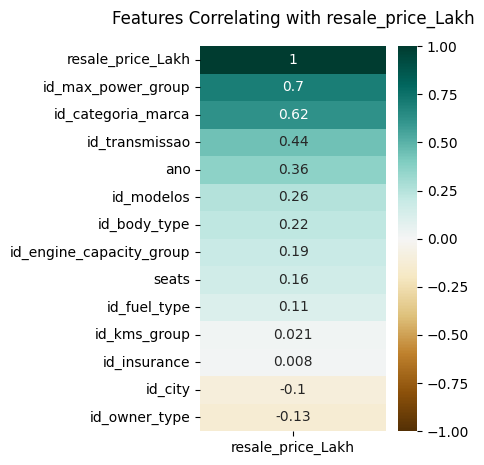

In [23]:
#correlation  

# Select columns
columns_of_interest = ['id_transmissao', 'id_body_type','id_modelos','id_categoria_marca','ano','id_city','id_insurance','seats','id_engine_capacity_group','id_fuel_type','id_kms_group','id_max_power_group','id_owner_type','resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()

In [27]:
#Export
#Not the target
colunas_selecionadas = ['id_body_type','id_modelos','id_categoria_marca','ano','id_city','id_insurance','seats','id_engine_capacity_group','id_fuel_type','id_kms_group','id_max_power_group','id_owner_type']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('Xcenario1.csv', index=False)
    print(f"Colunas selecionadas exportadas para 'Xcenario1.csv'")
else:
    print("Algumas das colunas selecionadas não existem no DataFrame.")

Colunas selecionadas exportadas para 'Xcenario1.csv'


In [24]:
print(df.columns)


Index(['full_name', 'registered_year', 'engine_capacity', 'insurance',
       'transmission_type', 'kms_driven', 'owner_type', 'fuel_type',
       'max_power', 'seats', 'mileage', 'body_type', 'city',
       'resale_price_Lakh', 'ano', 'marca', 'modelo', 'max_power_group',
       'kms_group', 'engine_capacity_group', 'categoria_marca', 'id_fuel_type',
       'id_categoria_marca', 'id_engine_capacity_group', 'id_kms_group',
       'id_max_power_group', 'id_owner_type', 'id_insurance', 'id_city',
       'id_modelos', 'id_body_type', 'id_transmissao'],
      dtype='object')


In [25]:
# Lista de colunas que possuem IDs correspondentes
cols_to_drop = [
    'full_name',
    'registered_year'
]

# Eliminar as colunas que têm IDs correspondentes
df = df.drop(columns=cols_to_drop)

In [26]:
print(df.columns)

Index(['engine_capacity', 'insurance', 'transmission_type', 'kms_driven',
       'owner_type', 'fuel_type', 'max_power', 'seats', 'mileage', 'body_type',
       'city', 'resale_price_Lakh', 'ano', 'marca', 'modelo',
       'max_power_group', 'kms_group', 'engine_capacity_group',
       'categoria_marca', 'id_fuel_type', 'id_categoria_marca',
       'id_engine_capacity_group', 'id_kms_group', 'id_max_power_group',
       'id_owner_type', 'id_insurance', 'id_city', 'id_modelos',
       'id_body_type', 'id_transmissao'],
      dtype='object')
